v 0.1.2

# Semivariogram regularization

Tutorial based on: - Goovaerts P., Kriging and Semivariogram Deconvolution in the Presence of Irregular Geographical Units, Mathematical Geology 40(1), 101-128, 2008

## Table of Content

1. Get areal and population data shapefiles.
2. Prepare semivariogram model.
3. Regularize semivariogram.
4. Show empirical, theoretical and regularized semivariograms of areal data.

In [1]:
%matplotlib inline

import numpy as np
from pyinterpolate.kriging.deconvolution import RegularizedModel
import matplotlib.pyplot as plt

### 1. Get areal and population data shapefiles.

In [2]:
polygon_address = '../../data/pol_part.shp'
population_address = '../../data/pol_pop_part.shp'

### 2. Prepare semivariogram model.

In [3]:
step = 5000
pop_lags = np.arange(0, 80000, step)
area_lags = np.arange(0, 80000, step)

dm = RegularizedModel(scaling_factor=4,
                      d_statistics_change=0.1,
                      ranges=16,
                      loop_limit=40,
                      min_no_loops=3,
                      number_of_loops_with_const_mean=3)

### 3. Regularize semivariogram.


Deconvolution:
Computation of experimental semivariogram of areal data...
Process complete!

Deconvolution:
Fitting theoretical model to the areal data
Model: spherical, error value: 4.2448760841955
Model: exponential, error value: 5.711559947333388
Model: linear, error value: 3.977213421509664
########## Chosen model: linear ##########
Process complete!

Deconvolution:
Setting of the initial point support model - function and parameters
Process complete!

Deconvolution:
Areal Semivariance fitting to the initial point support model
Start of the inblock semivariance calculation
Inblock population points updated
Inblock semivariance calculated successfully
Start of the distances between blocks calculations
Selected data: dict type
Distances between blocks calculated successfully and updated
Block to block Semivariance calculation process start...
Sorting areas by distance
Sort complete
Calculation of semivariances between areas separated by chosen lags
Semivariance between blocks for a 

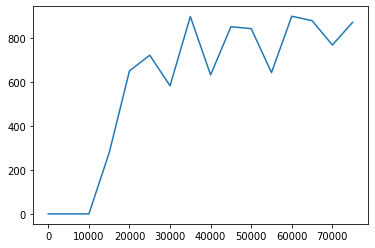

Process complete!

Deconvolution:
Difference statistics calculation...
Start of deviation calculation
Calculated deviation is: 0.27707946233195163
Process complete!

>> Iteration: 1

False False False

Deconvolution:
Beginning of rescalling procedure
Process complete!

Deconvolution:
Computation of experimental semivariogram of rescalled data...
Model: spherical, error value: 0.5424224051183714
Model: exponential, error value: 0.7997416594160227
Model: linear, error value: 0.6653580185579937
########## Chosen model: spherical ##########
Process complete!

Deconvolution:
Regularization of the rescalled model
Start of the inblock semivariance calculation
Inblock population points updated
Inblock semivariance calculated successfully
Start of the distances between blocks calculations
Selected data: dict type
Distances between blocks calculated successfully and updated
Block to block Semivariance calculation process start...
Sorting areas by distance
Sort complete
Calculation of semivarianc

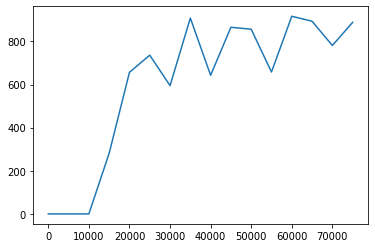

Process complete!

Deconvolution:
Difference statistics calculation...
Start of deviation calculation
Calculated deviation is: 0.28109412701147724
Process complete!

>> Iteration: 2

D stat mean: 0.27494995056104715
False False False

Deconvolution:
Beginning of rescalling procedure
Process complete!

Deconvolution:
Computation of experimental semivariogram of rescalled data...
Model: spherical, error value: 0.2754906152435938
Model: exponential, error value: 0.5774280678083036
Model: linear, error value: 0.316010054433695
########## Chosen model: spherical ##########
Process complete!

Deconvolution:
Regularization of the rescalled model
Start of the inblock semivariance calculation
Inblock population points updated
Inblock semivariance calculated successfully
Start of the distances between blocks calculations
Selected data: dict type
Distances between blocks calculated successfully and updated
Block to block Semivariance calculation process start...
Sorting areas by distance
Sort com

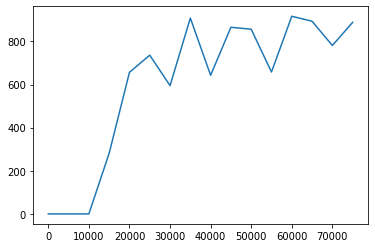

Process complete!

Deconvolution:
Difference statistics calculation...
Start of deviation calculation
Calculated deviation is: 0.28109412701147724
Process complete!

>> Iteration: 3

False False False

Deconvolution:
Beginning of rescalling procedure
Process complete!

Deconvolution:
Computation of experimental semivariogram of rescalled data...
Model: spherical, error value: 0.18291382585609045
Model: exponential, error value: 0.466747842196048
Model: linear, error value: 0.1601122777793748
########## Chosen model: linear ##########
Process complete!

Deconvolution:
Regularization of the rescalled model
Start of the inblock semivariance calculation
Inblock population points updated
Inblock semivariance calculated successfully
Start of the distances between blocks calculations
Selected data: dict type
Distances between blocks calculated successfully and updated
Block to block Semivariance calculation process start...
Sorting areas by distance
Sort complete
Calculation of semivariances 

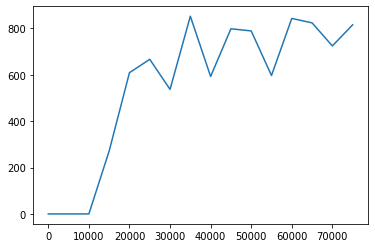

Process complete!

Deconvolution:
Difference statistics calculation...
Start of deviation calculation
Calculated deviation is: 0.2666762623397127
Process complete!

>> Iteration: 4

False False False

Deconvolution:
Beginning of rescalling procedure
Process complete!

Deconvolution:
Computation of experimental semivariogram of rescalled data...
Model: spherical, error value: 0.13786753825385717
Model: exponential, error value: 0.2976623972350171
Model: linear, error value: 0.08064551256900912
########## Chosen model: linear ##########
Process complete!

Deconvolution:
Regularization of the rescalled model
Start of the inblock semivariance calculation
Inblock population points updated
Inblock semivariance calculated successfully
Start of the distances between blocks calculations
Selected data: dict type
Distances between blocks calculated successfully and updated
Block to block Semivariance calculation process start...
Sorting areas by distance
Sort complete
Calculation of semivariances

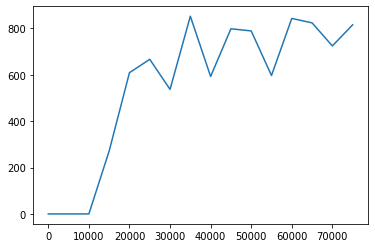

Process complete!

Deconvolution:
Difference statistics calculation...
Start of deviation calculation
Calculated deviation is: 0.2666762623397127
Process complete!

>> Iteration: 5

D stat mean: 0.27148221723030086
Constant mean of deviation value, iteration stopped. 0.01
False True False

Deconvolution:


##################
Setting final models
##################
Models set
Process complete!


In [4]:
optimal_pt_support_model = dm.regularize_model(areal_data_file=polygon_address,
                                               areal_lags=area_lags,
                                               areal_step_size=step,
                                               data_column='LB RATES 2',
                                               population_data_file=population_address,
                                               population_value_column='TOT',
                                               population_lags=pop_lags,
                                               population_step_size=step,
                                               id_column_name='IDx')

### 4. Show empirical, theoretical and regularized semivariograms of areal data.

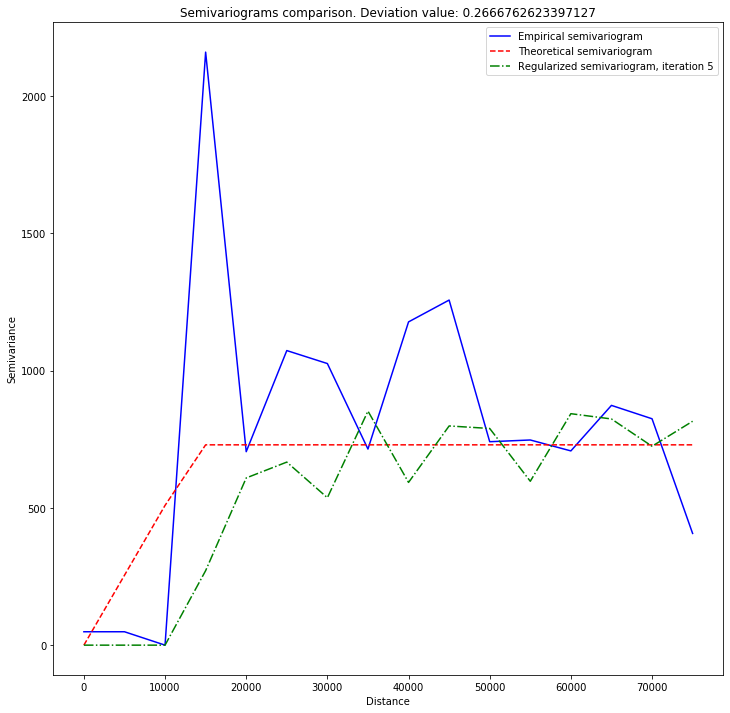

In [5]:
dm.show_semivariograms()